### Task

This homework is about parameter estimation and feedforward adaptive
control of mechanical systems. In particular we consider planar two link ma-
nipulator (Fig.1).

The dynamics of the robot can be written in standard manipulator form [1]

$$M (q)\ddot{q} + C(q, \dot{q})\dot{q} + g(q) = \tau$$

where $q =\begin{bmatrix}q_1 & q_2\end{bmatrix}^T$ (1)


as well as in regressor form
$$Y (q, \dot{q}, \ddot{q})\pi = \tau$$(2)


Therefore all the algorithms you studied during the last two labs can be applied
to this robot (hooray).

Complete the following tasks:

1. choose physically adequate values for kinematic ($l_1$ , $l_2$ ) and dynamic parameters ($l_{c1}$ , $l_{c2}$ , $m_1$ , $m_2$ )

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [2]:
l_1 = 0.5
l_2 = 0.5
l_c1 = 0.25
l_c2 = 0.25
m_1 = 0.2
m_2 = 0.2

g = 9.81

## **Answer**
As known, from the course of physics:

$I_i = \frac{1}{3}m_i l_{ci}^{2}$ - inertia moment

Let's find matrices M, C and g from the given source:

Given:


$$d_{11}\ddot{q_1} + d_{12}\ddot{q_2} + c_{121}\dot{q_1}\dot{q_2}+ c_{211}\dot{q_2}\dot{q_1} + c_{221}\dot{q_2}^2 + \phi_1 = \tau_1$$
$$d_{21}\ddot{q_1} + d_{22}\ddot{q_2} + c_{112}\dot{q_1}^2 + \phi_2 = \tau_2$$

Can be rwritten as:

$$\begin{bmatrix} d_{11} & d_{12} \\ d_{21} & d_{22}\end{bmatrix}\ddot{q} +
\begin{bmatrix} c_{121}\dot{q_2} & c_{211}\dot{q_1} \\ c_{112}\dot{q_1} & 0 \end{bmatrix}\dot{q} + 
\begin{bmatrix} \phi_1 \\ \phi_2 \end{bmatrix} = \tau$$

where

$$d_{11} = m_1 l_{c1}^2 + m_2(l_1^2 + l_{c2}^2 + 2l_1l_{c2}^2 + 2l_1l_{c2}cos(q_2)) + 
\frac{1}{3}m_1 l_{c1}^2 +  \frac{1}{3}m_2 l_{c2}^2 $$

$$d_{12}=d_{21} = m_2(l_{c2}^2 + l_1 l_{c2} cos(q_2)) + \frac{1}{3}m_2 l_{c2}^2$$

$$d_{22} = \frac{4}{3} m_2 l_{c2}^2 $$

thus, $$\boxed{M(q) = \begin{bmatrix}  m_2l_1(l_1 + 2l_{c2}^2 + 2l_{c2}cos(q_2)) + 
\frac{4}{3}m_1 l_{c1}^2 +  \frac{4}{3}m_2 l_{c2}^2 &
m_2l_1 l_{c2} cos(q_2) + \frac{4}{3}m_2 l_{c2}^2 
\\ m_2 l_1 l_{c2} cos(q_2) + \frac{4}{3}m_2 l_{c2}^2 & 
\frac{4}{3} m_2 l_{c2}^2 \end{bmatrix}}$$

It is known, that

$$c_{121}=c_{211} = -m_2l_1l_{c2}sin(q_2) = -c_{112} = h$$

So, 

$$\boxed{C (q, \dot{q})= \begin{bmatrix} h\dot{q_2} & h(\dot{q_2} + \dot{q_1}) \\ -h\dot{q_1} & 0\end{bmatrix}}$$

Using, the fact that
$$\phi_1 = (m_1 l_{c1} + m_2 l_1)g cos(q_1) + m_2 l_{c2}gcos(q_1+q_2)$$
$$\phi_2 = m_2 l_{c2} cos(q_1 + q_2)$$

We can conclude that

$$\boxed{g (q)= \begin{bmatrix} (m_1 l_{c1} + m_2 l_1)g cos(q_1) + m_2 l_{c2}gcos(q_1+q_2) \\  m_2 l_{c2} cos(q_1 + q_2)\end{bmatrix}}$$

Also it s possible to find that:
$$Y (q, \dot{q}, \ddot{q}) = \begin{bmatrix} \ddot{q_2} & cos(q_2)(2\ddot{q_1} + \ddot{q_2})+sin(q_2)(\dot{q_1}^2 - 2\dot{q_1}\dot{q_2}) & \ddot{q_2} & gcos(q_1) & gcos(q_1 + q_2) \\
0 & cos(q_2)\ddot{q_1} + sin(q_2)\dot{q_1}^2 & \ddot{q_2} & 0 & gcos(q_1 + q_2)
\end{bmatrix}$$

and

$$\boxed{\Theta = \pi = \begin{bmatrix} 
m_2 l_1^2 + \frac{4}{3}m_1 l_{c1}^2 + \frac{4}{3}m_2 l_{c2}^2 \\
m_2l_1l_{c2}\\
m_2l_1l_{c2}\\
m_1 l_{c1} + m_2 l_1 \\
m_2l_2
\end{bmatrix}}$$

Criterias of chosing parameters:
    
   $$ 0<l_{ci} < l_i$$

2. Using expressions for M (q), C(q, $\dot{q}$) and g(q) from [1] simulate the system;

In [3]:
def Y(q, q_dot, q_ddot):
    a = np.cos(q[1])*(2*q_ddot[0] + q_ddot[1]) 
    a += np.sin(q[1])*(q_dot[0]**2 - 2*q_dot[1]*q_dot[0])
    b = 9.81*np.cos(q[0])
    c = 9.81*np.cos(q[0]+q[1])
    d = np.cos(q[1])*q_ddot[0] + np.sin(q[1]*(q_dot[0]**2))
    return np.array([[q_ddot[1], a, q_ddot[1], b, c], 
                     [0, d, q_ddot[1], 0, c]])

def M(q):
    q_1 = q[0]
    q_2 = q[1]
    a = m_2*l_1*(l_1 + 2*l_c2**2 + 2*l_c2*np.cos(q_2)) + 4/3*(m_1*(l_c1**2))+ 4/3*(m_2*(l_c2**2))
    b = m_2*l_1*l_c2*np.cos(q_2) + 4/3*(m_2*(l_c2**2))
    k =  4/3*(m_2*(l_c2**2))
    return np.array([[a, b], [b, k]])

def C(q, q_dot):
    q_1 = q[0]
    q_2 = q[1]
    q_dot_1 = q_dot[0]
    q_dot_2 = q_dot[1]
    h = -m_2*l_1*l_c2*np.sin(q_2)
    return np.array([[h*q_dot_2, h*(q_dot_2 + q_dot_1)], [-h*q_dot_1, 0]])

def G(q):
    q_1 = q[0]
    q_2 = q[1]
    res = np.array([(m_1*l_c1+ m_2*l_1)*9.81*np.cos(q_1) + m_2*l_c2*9.81*np.cos(q_1 + q_2), 
                     m_2*l_c2*np.cos(q_1+q_2)])
    return res



In [4]:
def simulation(x, t, tau):
    x = np.array([[x[0], x[1]], [x[2], x[3]]])
    m_min = np.linalg.inv(M(x[1]))
    a = m_min.dot(tau - G(x[1]) - C(x[1], x[0]).dot(x[0])) 
    b = x[0]
    return np.array([a, b]).transpose().flatten()

time = np.linspace(0, 5, 10000)
x_0 = [0.01, 0.01,0.001, 0.001]
res = odeint(simulation, x_0, time, args=(np.array([0.1, 0.1]), ))

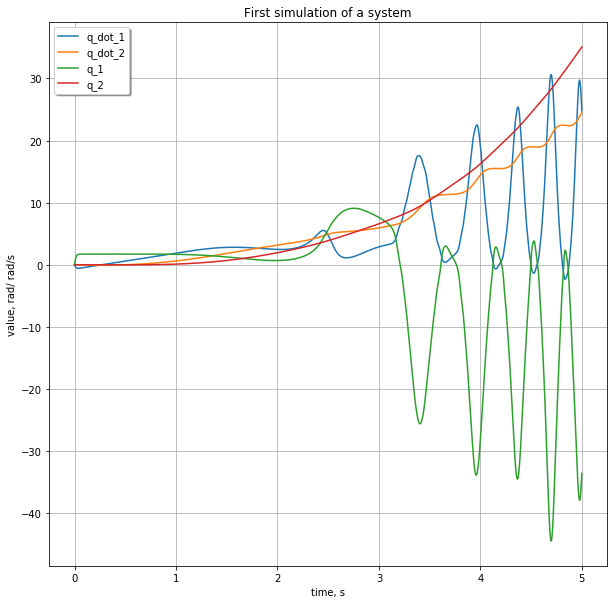

In [5]:
plt.figure(figsize=(10, 10))
plt.title("First simulation of a system")
plt.xlabel("time, s")
plt.ylabel("value, rad/ rad/s")
plt.plot(time, res)
plt.grid()
plt.legend(["q_dot_1", "q_dot_2","q_1", "q_2"], shadow=True)
# plt.savefig("simulation.png")

3. perform parameter estimation of the robot:

    - design PD controller for each joint of the robot ($\tau = K_p (q^∗ − q) + K_d ( \dot{q}^∗ − \dot{q}))$;

    - make the robot to track $q^∗(t) = \begin{bmatrix}cos(t) & cos(t)\end{bmatrix}^T$ for 5 seconds,
    record q(t) and $\dot{q}(t)$;

    - using expression for $Y (q, \dot{q}, \ddot{q})$ from [1] estimate parameters $\pi$ by
    means least squares;

    - for different trajectory perform validation of estimated parameters $\hat{\pi}$

In [456]:
def q_star(t):
    a = np.cos(t)
    return np.array([a, a])

def q_star_dot(t):
    a = -np.sin(t)
    return np.array([a, a])

In [463]:
k_p = np.array([1, 1])
k_d = np.array([10, 10])

def pd_control(x, t):
    x = np.array([[x[0], x[1]], [x[2], x[3]]])
    q_st, q_st_dot = q_star(t), q_star_dot(t)
    tau = k_p.dot(q_st - x[0]) 
    tau += k_d.dot(q_st_dot - x[1])
    m_min = np.linalg.inv(M(x[1]))
    a = m_min.dot(tau - G(x[1]) - C(x[1], x[0]).dot(x[0])) 
    b = x[0]
    return np.array([a, b]).transpose().flatten()

inp = [0, 0, 0.01, 0.01]
ddot = odeint(pd_control, inp, time)

/usr/local/lib/python3.7/dist-packages/matplotlib/ticker.py:2036: RuntimeWarning: overflow encountered in multiply
  steps = self._extended_steps * scale


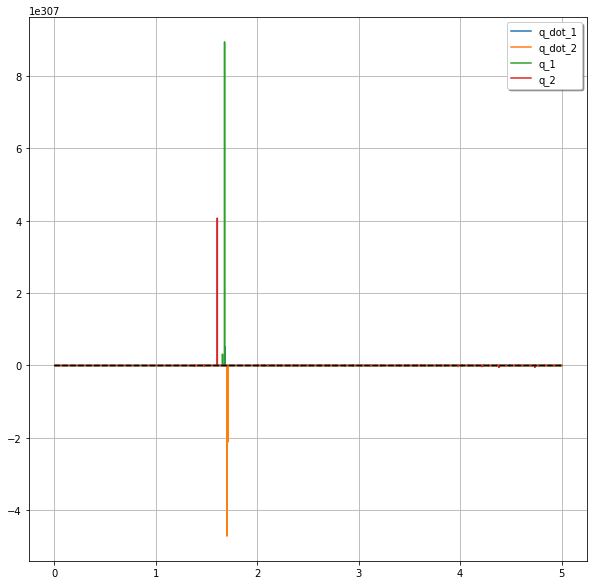

In [464]:
plt.figure(figsize=(10, 10))
plt.plot(time[10:], ddot[10:])
plt.plot(time, np.cos(time), "k--")
plt.grid()
plt.legend(["q_dot_1", "q_dot_2","q_1", "q_2"], shadow=True)

4. assume that masses of each link slowly changes according to the rule that
you choose (different rule for each link). Design computed torque controller with feedforward adaptive term (follow steps from lab). For online
parameter estimation use gradient descent. Show performance of the controller on two complex trajectories that you choose.

### ref
M. W. Spong, S. Hutchinson, and M. Vidyasagar, Robot modeling and con-
trol. John Wiley & Sons, 2020.

Done by FUCHING NOT Alina Bogdanova BS18-04

In [469]:

import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import random
from math import cos, sin

In [470]:
# Choose physically adequate values for kinematics
l1 = 0.5
l2 = 0.5
# Dynamic
lc1 = 0.25
lc2 = 0.25
m1 = 0.2
m2 = 0.2


In [471]:
# Inertial Forces due to acceleration of the joints
def M(q):
    q1, q2 = q
    M_11 = 4*m1*(lc1**2)/3 + m2 * (l1**2 + (lc2**2)/3 + 2*l1 * lc2 * cos(q2))
    M_12 = 4*m2 * (lc2**2)/3 + m2 * l1 * lc2 * cos(q2) 
    M_21 = 4*m2 * (lc2**2)/3 + m2 * l1 * lc2 * cos(q2) 
    M_22 = 4*m2 * (lc2**2)/3 
    
    return np.asarray([[M_11, M_12], [M_21, M_22]])

# The Coriolis and centrifugal forces
def C(q, q_dot):
    q1, q2 = q
    q1_dot, q2_dot = q_dot
    
    C_11 = -m2 * l1 * lc2 * sin(q2) * q2_dot
    C_12 = -m2 * l1 * lc2 * sin(q2) * (q1_dot + q2_dot)
    C_21 = m2 * l1 * lc2 * sin(q2) * q1_dot
    C_22 = 0
    return np.asarray([[C_11, C_12], [C_21, C_22]])

    
def g(q):
    q1, q2 = q
    
    g_1 = (m1 * lc1 + m2 * l1) * 9.81 * cos(q1) + m2 * lc2 * 9.81 * cos(q1 + q2) 
    g_2 = m2 * lc2 * 9.81 * cos(q1 + q2)
    return np.asarray([g_1, g_2])

In [472]:


time = np.linspace(0, 5, 100)   

def x_dot(x, time, tau):
    q = np.asarray([x[0], x[1]])
    q_dot = np.asarray([x[2], x[3]])
    q_ddot = np.linalg.inv(M(q)).dot(-C(q, q_dot).dot(q_dot) - g(q) + tau)
    result = []
    result.extend(q_dot)
    result.extend(q_ddot)
    return  np.asarray(result)

# print(x_dot(x0, time, 0))
x0 = [1,1,0,0]

solution = {"Open Loop": odeint(x_dot , x0, time, args=(0,))}

In [475]:
kp = 10;
kd = 1;

def x_dot_controlled(x, time):
    
    q_desired = [cos(time),cos(time)]
    q_dot_desired = [-sin(time),-sin(time)]
    
    q = np.asarray([x[0], x[1]])
    q_dot = np.asarray([x[2], x[3]])
    error = q_desired - q
    error_dot = q_dot_desired - q_dot
    q_ddot = np.linalg.inv(M(q)).dot(-C(q, q_dot).dot(q_dot) - g(q)+kd*error_dot + kp*error_dot)
    result = []
    result.extend(q_dot)
    result.extend(q_ddot)
  
    return  np.asarray(result)

solution = odeint(x_dot_controlled , x0, time).T

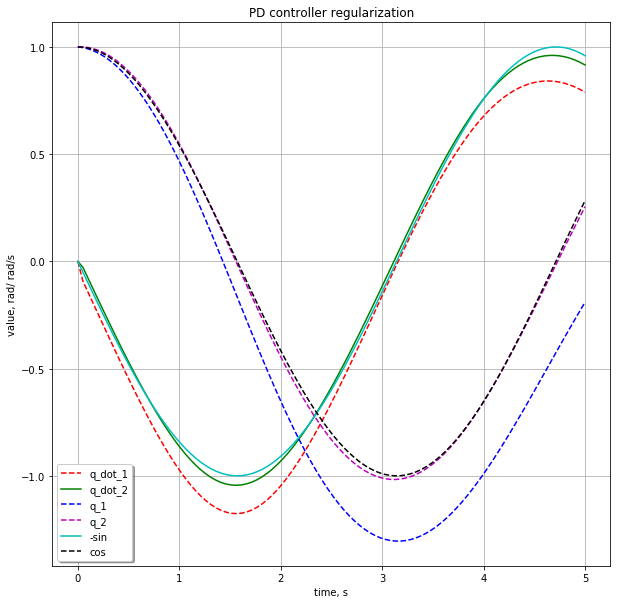

In [477]:
plt.figure(figsize=(10, 10))
plt.title("PD controller regularization")
plt.xlabel("time, s")
plt.ylabel("value, rad/ rad/s")
plt.plot(time, solution[2], 'r--', label="q_dot_1")
plt.plot(time, solution[3], 'g-', label="q_dot_2")
plt.plot(time, solution[0], 'b--', label="q_1")
plt.plot(time, solution[1], 'm--', label="q_2")


plt.plot(time, -np.sin(time), "c-", label="-sin")
plt.plot(time, np.cos(time), "k--", label="cos")
plt.legend(shadow=True)
plt.grid()
plt.savefig("PD.png")